## Sina Ebrahimi
## 4032524001
## Exercise 3 Pattern Recognition Course

In [ ]:
from utils.main import mean_variance,make_blocks
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import  convolve
from skimage.feature import hog
from skimage import exposure

### lbp function

In [22]:
def get_pixel(img, center, x, y): 
      
    new_value = 0
      
    try: 
        # If local neighbourhood pixel  
        # value is greater than or equal 
        # to center pixel values then  
        # set it to 1 
        if img[x][y] >= center: 
            new_value = 1
              
    except: 
      
        pass
      
    return new_value 
   
# Function for calculating LBP 
def lbp_calculated_pixel(img, x, y): 
   
    center = img[x][y] 
   
    val_ar = [] 
      
    # top_left 
    val_ar.append(get_pixel(img, center, x-1, y-1)) 
      
    # top 
    val_ar.append(get_pixel(img, center, x-1, y)) 
      
    # top_right 
    val_ar.append(get_pixel(img, center, x-1, y + 1)) 
      
    # right 
    val_ar.append(get_pixel(img, center, x, y + 1)) 
      
    # bottom_right 
    val_ar.append(get_pixel(img, center, x + 1, y + 1)) 
      
    # bottom 
    val_ar.append(get_pixel(img, center, x + 1, y)) 
      
    # bottom_left 
    val_ar.append(get_pixel(img, center, x + 1, y-1)) 
      
    # left 
    val_ar.append(get_pixel(img, center, x, y-1)) 
       
    # convert binary values to decimal 
    power_val = [1, 2, 4, 8, 16, 32, 64, 128] 
   
    val = 0
      
    for i in range(len(val_ar)): 
        val += val_ar[i] * power_val[i] 
          
    return val 

### plotting the lbp image and the original one

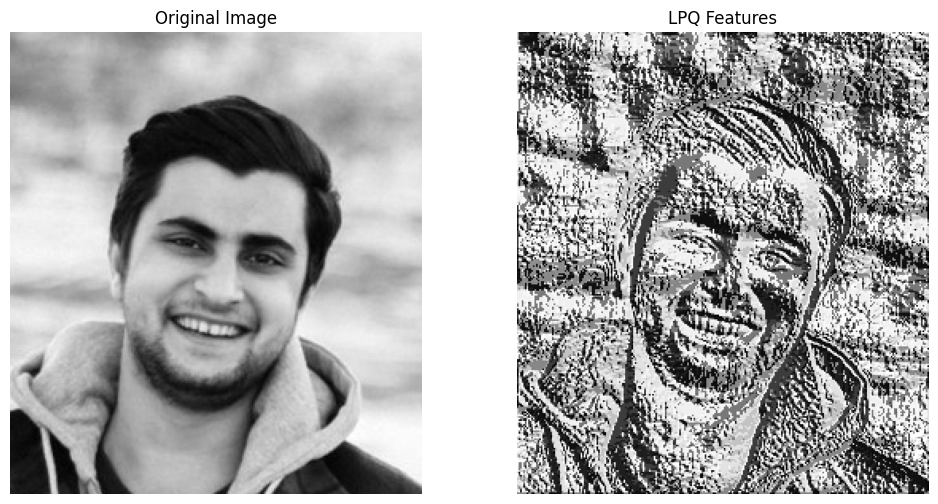

In [51]:
path = 'me1.jpg'
img_bgr = cv2.imread(path, 1) 
   
height, width, _ = img_bgr.shape 
   
 
img_gray = cv2.cvtColor(img_bgr, 
                        cv2.COLOR_BGR2GRAY) 
   

img_lbp = np.zeros((height, width), 
                   np.uint8) 
   
for i in range(0, height): 
    for j in range(0, width): 
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j) 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('LPQ Features')
plt.imshow(img_lbp, cmap='gray')
plt.axis('off')

plt.show()
   


### printing mean and variance vector from last practice

In [55]:
m,v=mean_variance(make_blocks(img_gray))
print(m,v)

[np.float64(162.90174471992654), np.float64(117.277318640955), np.float64(176.77777777777777), np.float64(189.96510560146925), np.float64(147.99357208448117), np.float64(174.71074380165288), np.float64(126.62626262626263), np.float64(129.52341597796143), np.float64(165.43434343434345)] [np.float64(1386.143697598744), np.float64(6070.688934591763), np.float64(2557.3206815631056), np.float64(2749.708607908958), np.float64(2686.399407717715), np.float64(3428.5894254339037), np.float64(4063.9181716151406), np.float64(2865.046513216311), np.float64(5072.842567084992)]


In [26]:
def lpq(image, win_size=3):
    
    STFTalpha = 1 / win_size
    conv_mode = 'reflect'
    
    x = np.arange(-(win_size - 1) // 2, (win_size - 1) // 2 + 1, dtype=float)
    n = len(x)
    w0 = np.ones_like(x) / np.sqrt(n)

    w1 = np.exp(-2 * np.pi * 1j * x * STFTalpha)
    
    f = np.zeros((n, n), dtype=complex)

    f[:, 0] = w0
    f[:, 1] = w1
    f[:, 2] = np.conj(w1)
    
    img = image.astype('float32')
    f_img = np.zeros((3, img.shape[0], img.shape[1]), dtype=complex)

    for i in range(3):
        f_img[i] = convolve(img, np.real(f[:, i].reshape(n, 1)), mode=conv_mode) + \
                   1j * convolve(img, np.imag(f[:, i].reshape(n, 1)), mode=conv_mode)

    # Create LPQ descriptor by thresholding the real and imaginary parts
    lpq_desc = ((np.angle(f_img[0]) > 0).astype(int) +
                2 * (np.angle(f_img[1]) > 0).astype(int) +
                4 * (np.angle(f_img[2]) > 0).astype(int)).astype(np.uint8)
    
    return lpq_desc

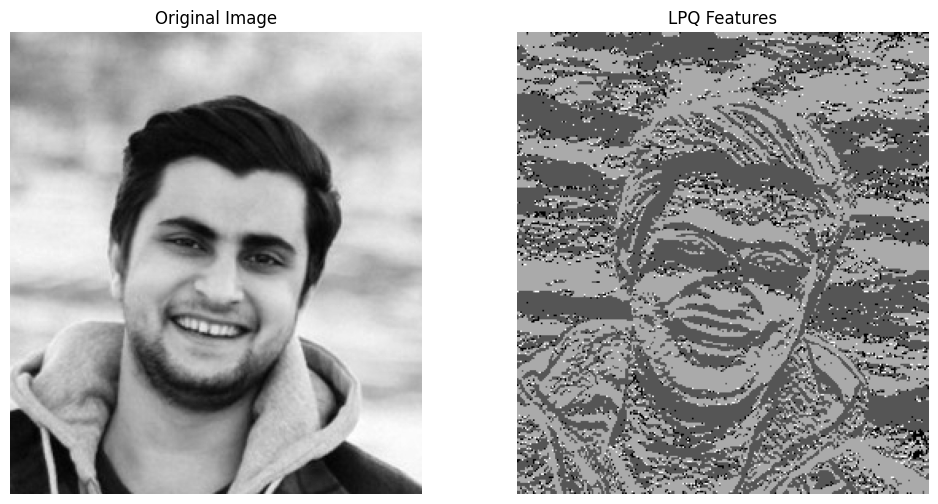

In [27]:
lpq_features = lpq(img_gray)

# Plotting the original image and the LPQ features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('LPQ Features')
plt.imshow(lpq_features, cmap='gray')
plt.axis('off')

plt.show()

### HOG

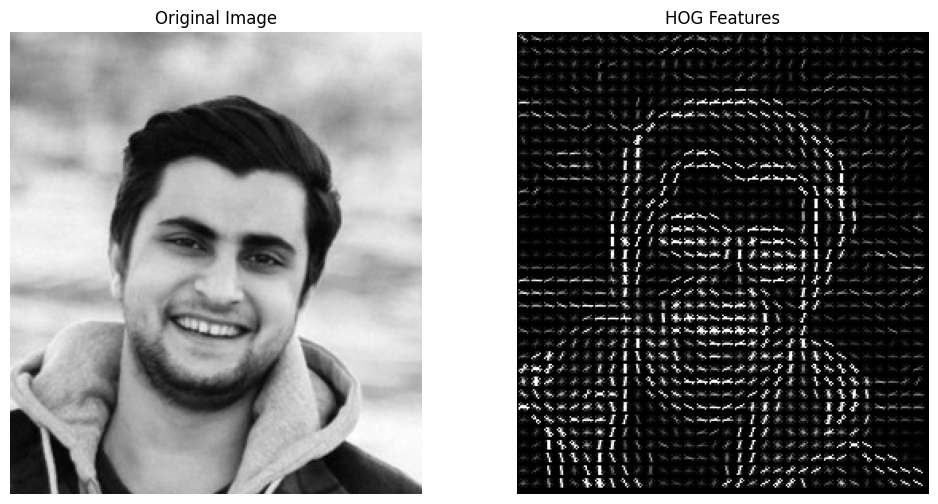

In [28]:
hog_features, hog_image = hog(
    img_gray, 
    orientations=9, 
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2), 
    visualize=True,
    channel_axis=None
)

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Plot original image and HOG image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('HOG Features')
plt.imshow(hog_image_rescaled, cmap='gray')
plt.axis('off')

plt.show()